Using linear regression in hotel booking dataset to determine the people who will likely cancel their reservation

In [1]:
#data analysis libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression  
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,plot_confusion_matrix
from sklearn.metrics import precision_recall_curve,plot_precision_recall_curve, plot_roc_curve

#Visulaization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Preprocessing
from sklearn.preprocessing import StandardScaler


#To know the accuracy of the model


#ignore warnings 
import warnings
warnings.filterwarnings('ignore')

In [2]:
data =pd.read_csv('hotel_booking.csv')
data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [3]:
data =pd.read_csv('hotel_booking.csv')
data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.00,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.00,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.00,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.00,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.00,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,Transient,96.14,0,0,Check-Out,2017-09-06,Claudia Johnson,Claudia.J@yahoo.com,403-092-5582,************8647
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,Transient,225.43,0,2,Check-Out,2017-09-07,Wesley Aguilar,WAguilar@xfinity.com,238-763-0612,************4333
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,Transient,157.71,0,4,Check-Out,2017-09-07,Mary Morales,Mary_Morales@hotmail.com,395-518-4100,************1821
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,Transient,104.40,0,0,Check-Out,2017-09-07,Caroline Conley MD,MD_Caroline@comcast.net,531-528-1017,************7860


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [5]:
data.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [6]:
data.drop(['company', 'agent'], axis = 1, inplace = True)
data.isnull().sum()

hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            4
babies                              0
meal                                0
country                           488
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
days_in_waiting_list                0
customer_type                       0
adr                                 0
required_car

In [7]:
data[data['children'].isnull()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
40600,City Hotel,1,2,2015,August,32,3,1,0,2,...,Transient-Party,12.0,0,1,Canceled,2015-08-01,Craig Campos,CraigCampos@mail.com,820-622-9854,************7219
40667,City Hotel,1,1,2015,August,32,5,0,2,2,...,Transient-Party,12.0,0,1,Canceled,2015-08-04,David Murphy,David.Murphy94@yahoo.com,231-438-6733,************8925
40679,City Hotel,1,1,2015,August,32,5,0,2,3,...,Transient-Party,18.0,0,2,Canceled,2015-08-04,Frank Burton,Frank.Burton@comcast.net,395-084-3601,************6190
41160,City Hotel,1,8,2015,August,33,13,2,5,2,...,Transient-Party,76.5,0,1,Canceled,2015-08-09,Jerry Roberts,JRoberts@hotmail.com,979-355-3554,************5648


In [8]:
data['children'][data['children'].isnull()] =data['children'].mean()

In [9]:
data.isnull().sum()

hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            0
babies                              0
meal                                0
country                           488
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
days_in_waiting_list                0
customer_type                       0
adr                                 0
required_car

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 34 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

Dropping unnecessary columns

In [11]:
data.drop(['name', 'email', 'phone-number', 'credit_card', 'arrival_date_month', 'reservation_status_date', 'reservation_status' ], axis = 1, inplace= True)

In [12]:
data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,0,342,2015,27,1,0,0,2,0.0,...,0,C,C,3,No Deposit,0,Transient,0.00,0,0
1,Resort Hotel,0,737,2015,27,1,0,0,2,0.0,...,0,C,C,4,No Deposit,0,Transient,0.00,0,0
2,Resort Hotel,0,7,2015,27,1,0,1,1,0.0,...,0,A,C,0,No Deposit,0,Transient,75.00,0,0
3,Resort Hotel,0,13,2015,27,1,0,1,1,0.0,...,0,A,A,0,No Deposit,0,Transient,75.00,0,0
4,Resort Hotel,0,14,2015,27,1,0,2,2,0.0,...,0,A,A,0,No Deposit,0,Transient,98.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,35,30,2,5,2,0.0,...,0,A,A,0,No Deposit,0,Transient,96.14,0,0
119386,City Hotel,0,102,2017,35,31,2,5,3,0.0,...,0,E,E,0,No Deposit,0,Transient,225.43,0,2
119387,City Hotel,0,34,2017,35,31,2,5,2,0.0,...,0,D,D,0,No Deposit,0,Transient,157.71,0,4
119388,City Hotel,0,109,2017,35,31,2,5,2,0.0,...,0,A,A,0,No Deposit,0,Transient,104.40,0,0


In [13]:
data['market_segment'] = pd.factorize(data['market_segment'])[0] + 1
data['deposit_type'] = pd.factorize(data['deposit_type'])[0] + 1
data['assigned_room_type'] = pd.factorize(data['assigned_room_type'])[0] + 1
data['customer_type'] = pd.factorize(data['customer_type'])[0] + 1
data['distribution_channel'] = pd.factorize(data['distribution_channel'])[0] + 1
data['reserved_room_type'] = pd.factorize(data['reserved_room_type'])[0] + 1
data['meal'] = pd.factorize(data['meal'])[0] + 1
data['country'] = pd.factorize(data['country'])[0] + 1
data['hotel'] = pd.factorize(data['hotel'])[0] + 1
data.head(15)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,1,0,342,2015,27,1,0,0,2,0.0,...,0,1,1,3,1,0,1,0.00,0,0
1,1,0,737,2015,27,1,0,0,2,0.0,...,0,1,1,4,1,0,1,0.00,0,0
2,1,0,7,2015,27,1,0,1,1,0.0,...,0,2,1,0,1,0,1,75.00,0,0
3,1,0,13,2015,27,1,0,1,1,0.0,...,0,2,2,0,1,0,1,75.00,0,0
4,1,0,14,2015,27,1,0,2,2,0.0,...,0,2,2,0,1,0,1,98.00,0,1
5,1,0,14,2015,27,1,0,2,2,0.0,...,0,2,2,0,1,0,1,98.00,0,1
6,1,0,0,2015,27,1,0,2,2,0.0,...,0,1,1,0,1,0,1,107.00,0,0
7,1,0,9,2015,27,1,0,2,2,0.0,...,0,1,1,0,1,0,1,103.00,0,1
8,1,1,85,2015,27,1,0,3,2,0.0,...,0,2,2,0,1,0,1,82.00,0,1
9,1,1,75,2015,27,1,0,3,2,0.0,...,0,3,3,0,1,0,1,105.50,0,0


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 27 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  int64  
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_week_number        119390 non-null  int64  
 5   arrival_date_day_of_month       119390 non-null  int64  
 6   stays_in_weekend_nights         119390 non-null  int64  
 7   stays_in_week_nights            119390 non-null  int64  
 8   adults                          119390 non-null  int64  
 9   children                        119390 non-null  float64
 10  babies                          119390 non-null  int64  
 11  meal                            119390 non-null  int64  
 12  country         

#making training and testing datasets

In [15]:
y_all = data['is_canceled']
x_all = data.drop('is_canceled',axis=1,inplace =False)
x_train,x_test,y_train,y_test = train_test_split(x_all,y_all,test_size=0.1,random_state=101) 

# Scaling the data and using logistic Regression 

In [16]:
scaler_train= StandardScaler()
scaler_train.fit(x_train)
scaler_test= StandardScaler()
scaler_test.fit(x_test)
x_train_scaled = scaler_train.transform(x_train)
x_test_scaled = scaler_test.transform(x_test)

In [17]:
log_model= LogisticRegression()
log_model.fit(x_train_scaled, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# Prediction

In [18]:
y_pred= log_model.predict(x_test_scaled)

In [19]:
accuracy_score(y_test, y_pred)

0.7938688332356144

In [20]:
confusion_matrix(y_test, y_pred)

array([[7076,  454],
       [2007, 2402]], dtype=int64)

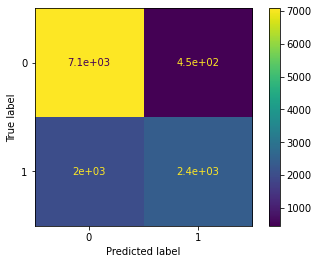

In [21]:
plot_confusion_matrix(log_model, x_test_scaled, y_test)

In [22]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.94      0.85      7530
           1       0.84      0.54      0.66      4409

    accuracy                           0.79     11939
   macro avg       0.81      0.74      0.76     11939
weighted avg       0.80      0.79      0.78     11939



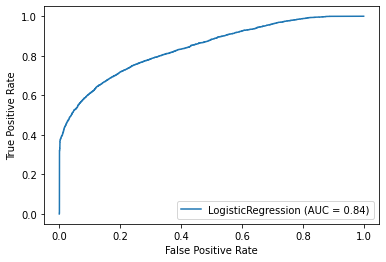

In [23]:
plot_roc_curve(log_model, x_test_scaled, y_test)

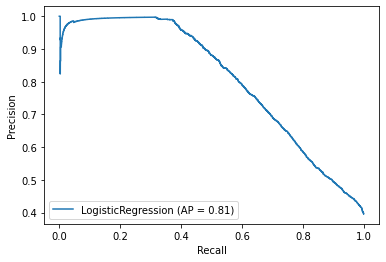

In [24]:
plot_precision_recall_curve(log_model, x_test_scaled, y_test)